In [2]:
import cv2
import numpy as np
from harris import harris_detection
import matplotlib.pyplot as plt

# 读取两幅图像
img1 = cv2.imread('images/uttower1.jpg')
img2 = cv2.imread('images/uttower2.jpg')
kp1 = harris_detection(img1)
kp2 = harris_detection(img2)

def show_img(img):
  """ 显示 CV2 的 BGR 图像为实际大小的 RGB 图像 """
  height, width = img.shape[:2]
  dpi = 100
  figsize = width / float(dpi), height / float(dpi)
  fig = plt.figure(figsize=figsize, dpi=dpi, frameon=False)
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), aspect='auto')
  plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
  plt.margins(0, 0)
  plt.show()

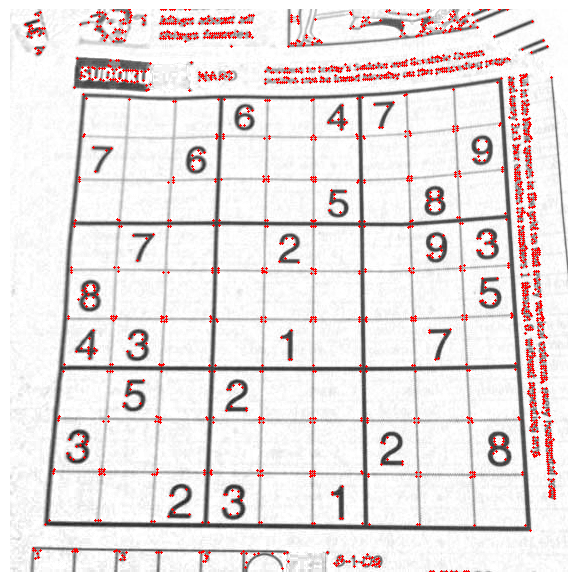

In [3]:
img = cv2.imread('images/sudoku.png')
kp1 = harris_detection(img)

for kp in kp1:
  pt = (int(kp.pt[0]), int(kp.pt[1]))
  cv2.circle(img, pt, 1, (0, 0, 255), -1)

show_img(img)

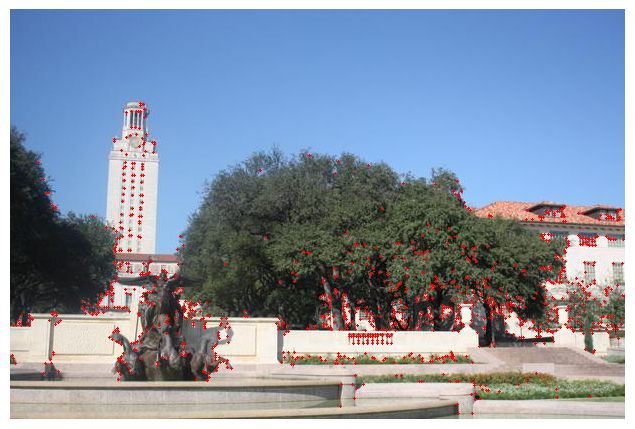

In [2]:
img1_copy = img1.copy()

for kp in kp1:
  pt = (int(kp.pt[0]), int(kp.pt[1]))
  cv2.circle(img1_copy, pt, 1, (0, 0, 255), -1)

show_img(img1_copy)

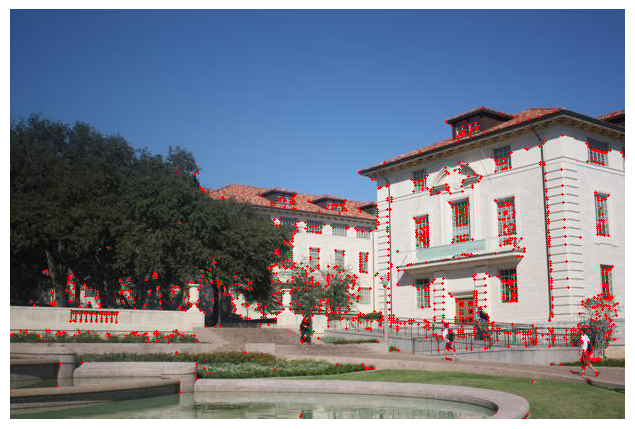

In [3]:
img2_copy = img2.copy()

for kp in kp2:
  pt = (int(kp.pt[0]), int(kp.pt[1]))
  cv2.circle(img2_copy, pt, 1, (0, 0, 255), -1)

show_img(img2_copy)

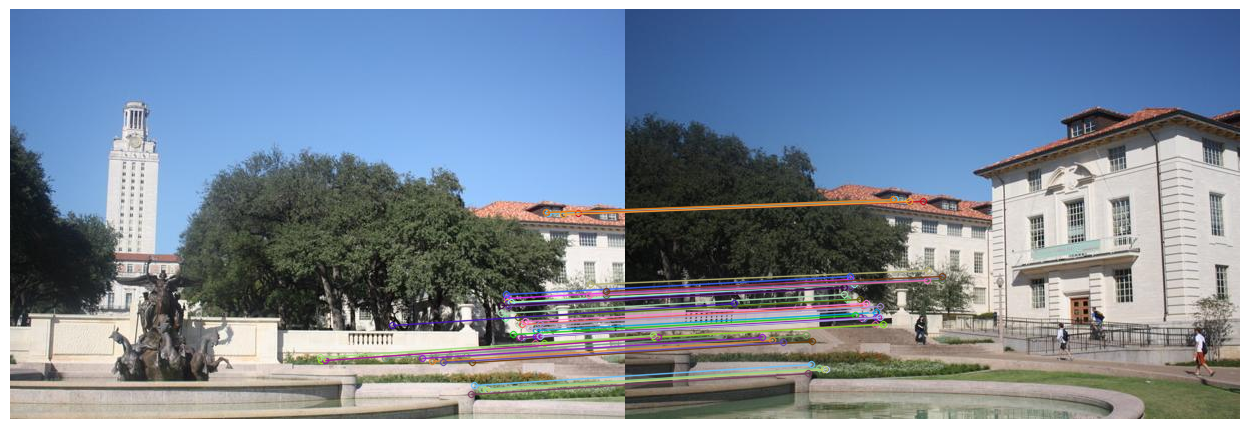

In [4]:
from hog import hog_match

matches = hog_match(img1, img2, kp1, kp2)

res = cv2.drawMatches(
  img1,
  kp1,
  img2,
  kp2,
  matches, None,
  flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

show_img(res)

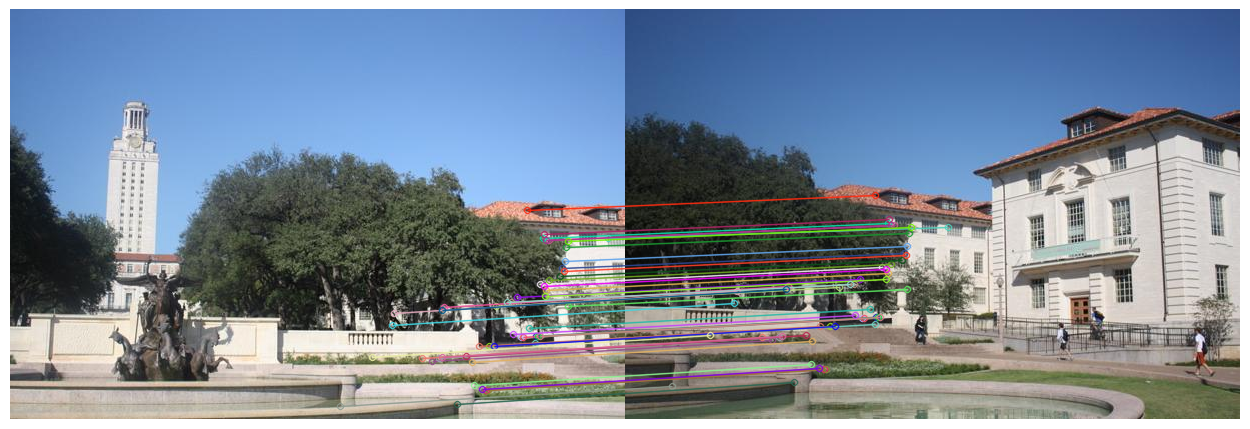

In [5]:
from sift import sift_match

matches = sift_match(img1, img2, kp1, kp2)

res = cv2.drawMatches(
  img1,
  kp1,
  img2,
  kp2,
  matches, None,
  flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

show_img(res)

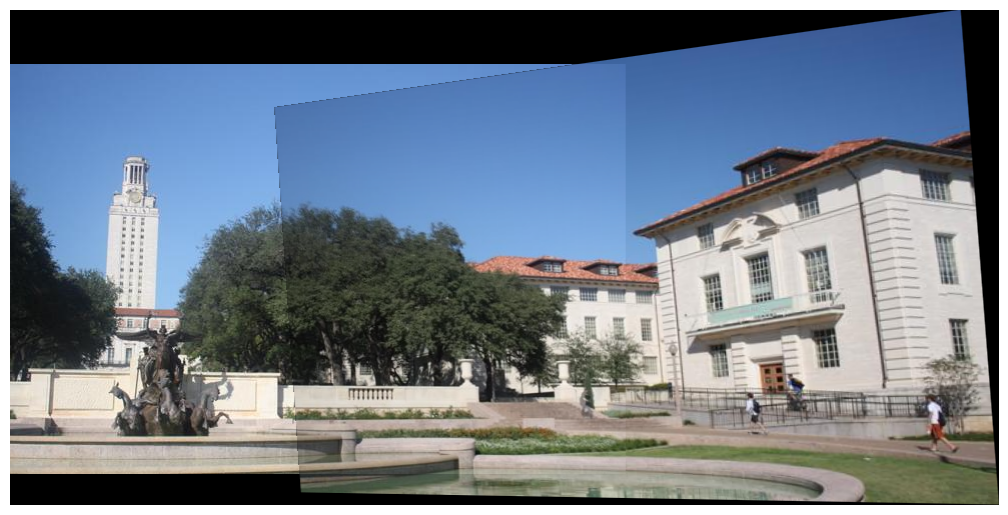

In [6]:
from ransac import ransac_stitch

stitched_img = ransac_stitch([img1, img2], HOG=True)

show_img(stitched_img)

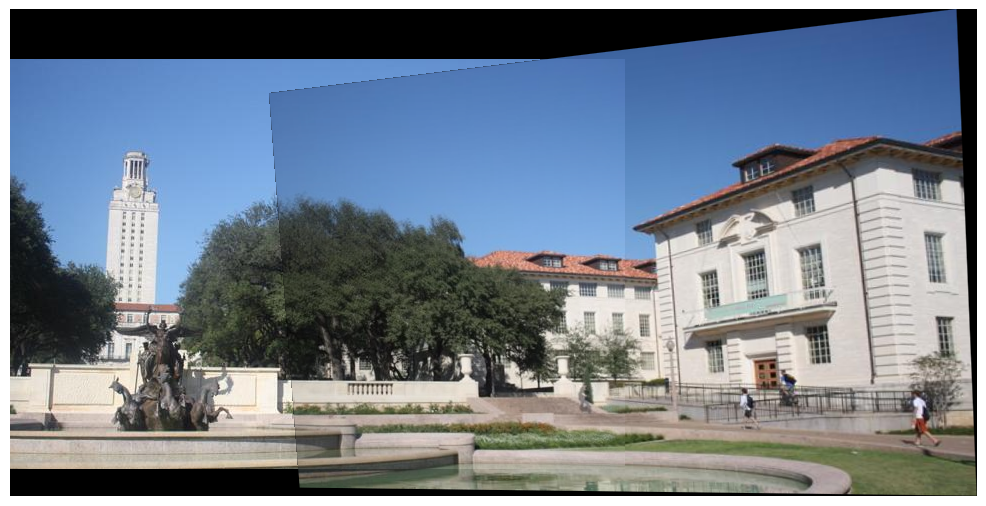

In [7]:
from ransac import ransac_stitch

stitched_img = ransac_stitch([img1, img2])

show_img(stitched_img)

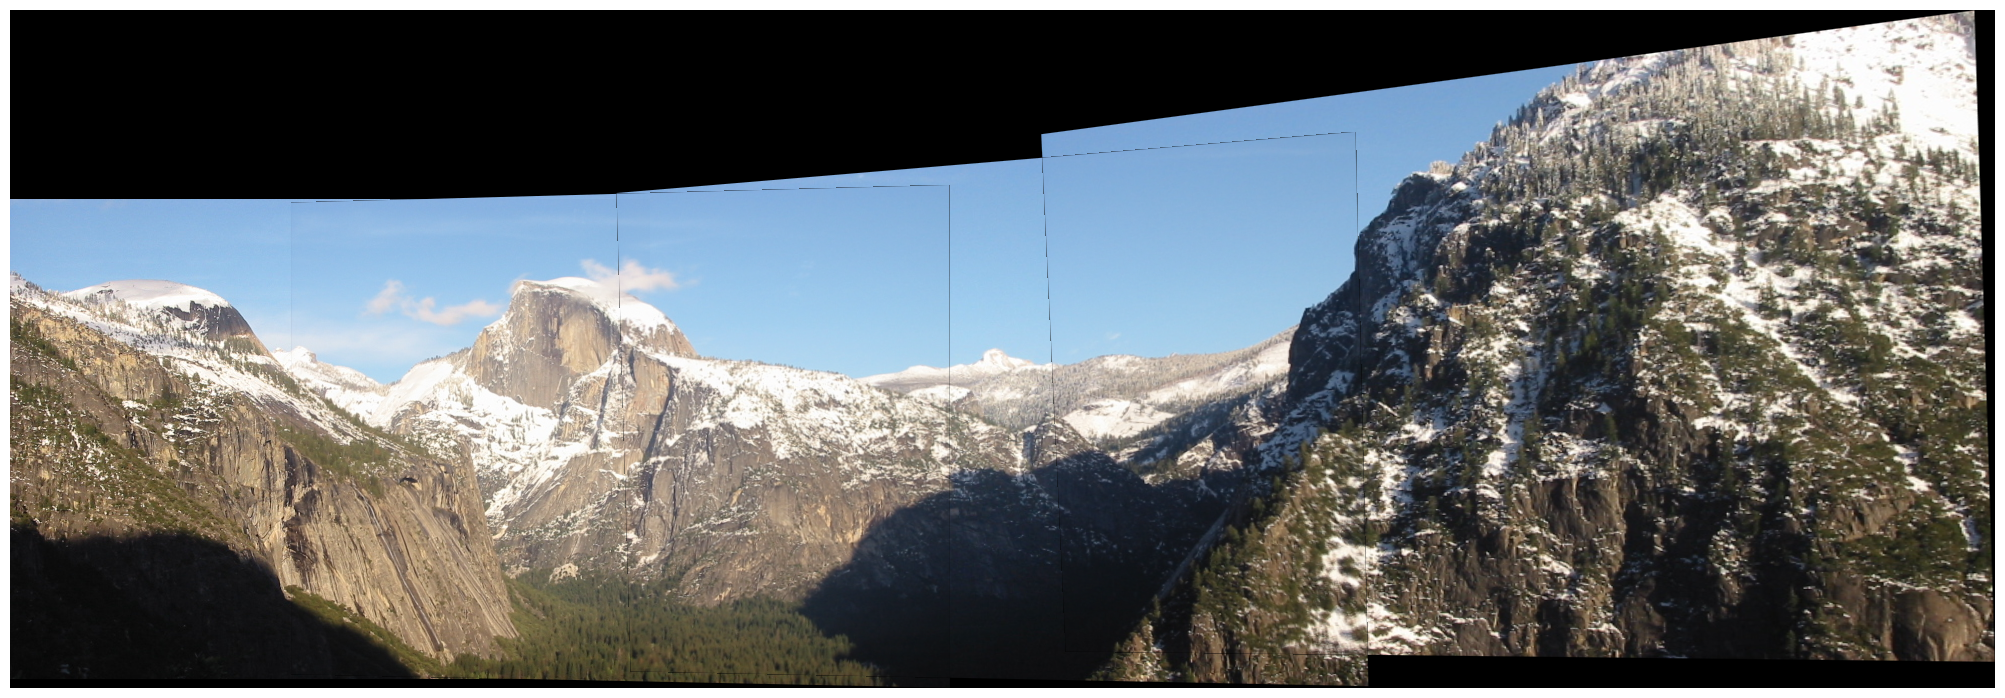

In [8]:
images = [
  cv2.imread('images/yosemite1.jpg'),
  cv2.imread('images/yosemite2.jpg'),
  cv2.imread('images/yosemite3.jpg'),
  cv2.imread('images/yosemite4.jpg'),
]

from ransac import ransac_stitch
stitched_img = ransac_stitch(images)

show_img(stitched_img)